# Guide to running tasks on your recipe

Welcome to this focused tutorial on utilizing the powerful tasks API within the Recipe Designer library. This guide is specifically tailored for users who are already familiar with the basics of creating and composing recipes in Recipe Designer. Our aim here is not to cover the recipe creation process, but rather to dive deep into the usage of Tasks.

## What is the Tasks API?
The tasks API in Recipe Designer enables you to execute a variety of tasks on your already composed recipes. These tasks are essential for bringing your machine learning models to life and assessing their performance. The available tasks you will learn to manipulate in this tutorial are:
- Visualize Data: Get a visual understanding of your dataset, and how the model will "see" it, even before you train.
- Train: Initiate the training process for your machine learning model.
- Evaluate: Assess the performance of your model post-training.
- Visualize Predictions: See how your model's predictions stand against the data's ground truths.
- Export Model: Export your trained model as a traced artifact for deployment or sharing.

### What This Tutorial Covers
In this tutorial you will learn how to:
- Invoke each task using the tasks API.
- Understand the inputs and outputs for each task.

### What This Tutorial Does Not Cover
It’s important to note that this tutorial assumes a basic understanding of Recipe Designer, particularly in recipe creation and composition. 
We will not cover how to [start a recipe from scratch](https://leipdocs.latentai.io/af/latest/content/reference/recipe_creators/), [how to edit your recipe](https://leipdocs.latentai.io/af/latest/content/getting-started/access_and_assignment/), or [how to load a recipe from our Golden Recipes](./GoldenRecipes.ipynb).


---

With the prerequisites out of the way, let’s dive into the world of the tasks API and explore how it can enhance your machine learning projects using Recipe Designer!



## Get a recipe

There are two ways to get a recipe: you can start one from scratch and fill all ingredients (advanced), or you can load an existing Serialized Portable Packaged Recipe (SPPR).
For this tutorial, we will load an SPPR.  

First step always is just to download a pantry of ingredients:

In [1]:
from leip_recipe_designer.helpers import download_pantry
pantry = download_pantry()

Download completed: workspace/pantries/vision_pantry/2.1.0


Lets now load a simple recipe. I will be loading it from an SPPR. An SPPR is a serialized and portable representation of a recipe that is ready to execute. Read more about SPPRs and how to store you recipe as one and load from one in this page.

In [37]:
from leip_recipe_designer.create import from_sppr
recipe = from_sppr('eJztfWmT48aR6Hf/CsSuJ0aKENmoG+gIPe9Io+utRprQyFc4HNw6u+khCYoge6bt1X9/WbgBAiR4jNzW83yQmkBVoiozK6/KylrL1XbzePubINDJys3vUv9nEISCW8VkLGQYSktCHRoXu1DHMYJXFEcIUaKQpBLBS2Ud08zEDP7FkSIU51CCQMmtvp+l87/b2wAVz+7t/O5+exv89h9bmb6d5j9/Ll7OV3qxM3a2TIxdzFJ9b5fyNthudrbTYJ2k2/Um0TZNk01/i43tb7DaLWf6Xq5WdpHeBqR4muy26912ZuablVxaP7y13N6nU7nZzp3U29kmSbY/39j362SzvSkGv0xW87d28/Msm+hv/5G/ndbT/nn223+UU5zAn+/mZnv/c/uTbr6wfoBSW5NPfLreFk1gEqndPPjZzB+kfmxNBN4li912nqxKfE9g2NMOSvNnrQ9nPyoKNF6FjocSaM6lFkjEUiCEQ2aohr+sC4k1NqJcWaNjo7nBEsXAJhFSUtrQhbYcx2wrN3d2O7sNpJvqZGOnMMxFOl3a7Wau06mxW6v9wIHE8HaTTn9MNvr+Vf761YvXBRy9kGk6K3q1qZzsZtt7wMB9sjBpPf9wyhp/i+aPOP+BBHVOSQ4T0ljHQofKacatFdxJGUkTe/YWkiAOT/zUtYqcYk7GhFAalt8CntjJRflreM7JejtfAitsZp6Nks3jVG+s3Nqq4wLYM5yGFFdPCraCCc+Xy9v0zmRvcKRRbBTm3EqKqIsIDomwIY+AMkxoqZARMExkKDaawFQQ0yKMYsuBiphVizJ5D6ib67crWBv1ulxIBQuiWKw1Grf2/Xb2rlizeVusaOhsLB2TIuJGcSdoGFGthYu4Jdg4iUMRW2xNZCTXhMQmtiTGOBJEsx4uWT9uPf1nC/+Z1Xx1N10kd3cZX9gVrN/PErkx32aPir6phEUBi/U2mOZjsjzWjFhsGEVKs5i7OGQoBoSEsXMmBOQJjEwUSq1DriMrpXaUI0c4yDG3L7FmsCLnq9vgd7/73f67B6B875u0vRS74H4eegsAy3cg9PTbdTJfAcJXu8WieGzswxykGdCmI0jrYVR8Uz9aJZulXMz/LjMx0XwBUvBdsoHmafNxIRrKBwTkP6PECMwZD62LhBIqslEMuJQR0J0z4EDlSBSySMUisiEyPOIKkIyQiocFgpaLhZL6bToFGWfmIGDLJ9PX+YM/zNOdH3q5UqSRa2CT1AuuXEyWT0rMgUxPttlMZxu7MtZLlnqBKmD8+lf+e/ZQfmQDXdZJ8z1I34w+GZeV6qB69HNPy1ySg0jaLedv9X3ybua/Mam/cQPrEJYGjnI4LRBpstto4Gm7nm3tcl1/svOi+eFMaRu7gteVMPSLFzfapH4cdrPJMOfkIrXdl3fblmgFPgK1kN4eaWbkVgIZdotMWfpf0/znzxXDOrlbbBsr4qYg9U0ma2ap3W5hraf/1Ue3qUfdtN3wFka2epylwNGL6aNclktjKd/nGtg2FHotIQZUeTEY+Gpadtkp+NRtAIsxe0IpVtgYUG48slrGhoOO4xZFRDIWYq5pzKWhMZIYMcS15dgQRCOwmJSxWozhfgsf24E6mFTs/0X+JNmM5vujpGghqCFTcs2aAc7++nks7spRDyCOUSp4zBVD2BHKQqIEkk47MBQjhJWhjIB0NsYIEUWAYaeQAnkR41gTFWk1Xsdmk4VvpxVS4LlOZiZ5t1ok8Ewt7PRzePKy8eAldII+FViT/57llp+bb+xErswkXSZvgS7QebIAuVo3L0DN3CZZznYbUAX32+06vb25Scl0l07e2XQ7QVO5lH9PVvKdH9LyZmHn64lfSBq+BYy9tautnE/nyc3G6vnapjf+Swhkw9/n69o4yBbAHBbFe1gBoIEn2d/WTFbJxLPL3SbZrUzV3pNn5klWk05LoHsmsm6OTs0bhGCnLOcLMDUrK61+7XXYrF6u6exvqVcrxchvGm9u5qt0K0EypbnmwyESU9+6A2y+lHfQJmO2EkzVoWoLjHXyZ6HP/kc9oL5PFo2HRZfnET+wVepApYLMylhzmk+ifg4Qd+kW2AKkMUh8r36PwoBvz81IGCALF25WL19ZL45VZi37FZ6LfyapUhzMsDiC/yqqQ0zB4kWWOTAWDffGkGBMUEoVNwSMNzD/LWEh0xIMZFNCrmRV/SmwzmZ/SxQMcLvbrJqaol6h949mI6fgEdnNfOl5fdGQemDL/d9E/ZB1/7x4WkDxcL3159m9AuzxIrfblj736m+RbKBtW2vnbW+D588+kinw79J+nAb/Gzz7yI866/JxCj/sg134Bf/xJIKf3s/aFu1y2Tlzu5X+DhqAVboCInw8oWHa+lAQ/C90lKu3H6dZNzCngbE+Tp+X/tmugZqM22AEKfiOq+Td7bM/T54tJ8/M7NnXk2evJs/e/DzLFl/Hsyz6P9iNSlJb82O60dnfHDPs7WoTOkYiCoIUMaAkQ1TGUQz6iRAsIs2Fk8ACDjljQXeByAXW8OTeJ3LDGASxBQrXNB95Fu7+ziynTcsStR0DOXeM95/MuvAyrmk+KByBtpkLSrD5IJNzrQe5am8+Sh9TsJ6aTzyeW7/9Um5bzw/zv7cHKMA9jpXE1CArwAtWXBFwkrmMjA41Ac+RRxGyMQFLgOqIOyzAbiYUU4Fi0IbDFkGmyOTuLlsqmSib5lJg2lj/rfctTT5PwfpceaQ3Ix3Qs3LzW55AzlcwpogqQgUGL5hSSZRBICFYqMGsAZXsQopARAgO1j44cSEHb0ohZxX4c4ZLNca+uVuvG5Z9km5f50EZWN6fZyGn3SYbUUcK3FkgBchqH+eZVXEc0GwbuWzIgIPBpE6UoEnYIHjbQl9uIoHCm4G4yhVEu3ltLM76je5m48H4ilAU3E1CwW2XzLMPIszKEOQwWJSW+AVqlAbHSUUEzCUKtpEkhEhiQ0ZoHV8pjL1jdlHerDCN7Cb/OX2RG0reCHqVPanAHLc0265uOcPGs7phaVTllNwmmzaOzCZZz0BhdX2PqvnsXmahH5mvwFajlvNa8nf9rB4EUDOdp97Uqtu3IK1Bey/tMtk8dl9srLOZU5dFbUql2lSz4MIXKN2bq490yWnZNB9PxAi4CQJMC6mIoVhgRjSiOBaSC8Ow1Zpqq4SMgQtAQ3OQISqUoJBDSWNGjwXXtnZhvRn/OP2x/KsUqknakoVdWZwZjZmCqp/tdvMGV8dEgawwSBHMQ0aRJC6KbEQjQa2IwdmJXKyx4pxqcJFCFGsdM0wYtYYobvWpQbN7u/CkAzcZ/A5Zr1Kvk4FQPliUB9ami00WJvZk2Ey/AKUCutp3+faHmqXk0keRqwhgHAtlmRUU5HUUMo6oBbPHMoONkCFWBEWwTmOqQiHB1zOSORQTESFBImIFO0aIb8soVr3EqljGZvqHXKf8/xmyGBdZ2Le+C0V8fuDA2XcgbYBczbjBagneglyuF1ncoIyrHXN+2z5vNcbMfKh+lZ6wRGAaxJHFSodMgXIVlMUYcxHH0seVQc5HhlkEskEIYuIwjEkEvjCDdSaROcprDTNqtl7swGrOvN3X2Z+jvfkaSMehr1Sk0pyCxmd+sD6o6ghMi5vY6kiHoWUcvPkQxwrmp50iBGnnFFgXBCQZlyI8No+GHTlrCNXyUTG1H7JfX+VSFqjemma+WZCuwZt2c10ZpQcZK80d3P8qPuPmdmFSMPjTduy143etZhXXNBqN5JsDLrZmiDgfO6KAQMeRklQahDWPtBNgr0suCcgnjkPDrQKVQf1+TMxljCN4hcYE1n/MrdxKHmvQFYV6vlvvKkTlseZq+uXacKCwYVk/zLxv04om3m2kmXs9qxfz9Uwu7pLNfHsP5mfDfG23yVyEeqNhMV/Ot3msoI5VoWn5Ze+8gcu2eZwB9rd2DS9Z+c7bbkBA7Z0AFIbNx979a4e8AHzVtnYX9DzNAuTPCS7dtxTGsrV3nkomD8gYjCiPMKxbcLVCHoLGMxqIgYFWkQ0VI06A7pCwhhGS1soojCQYcRS0uAJvrNKCpZ3VY17i3WruPdh+p7pcNJl1lk7/niTTzTtPW/DTJtYB33v8AldNCspPwP6e7kNvB2GAElubbj/Ep/vgV+CL37ge3zU/vQ9978PN0X2ITzfhD8qgXNzdVFbMbdAwY15aLR+7TastxdvgzVcv+2VUOzZ0xE8adFjGuBqnoeaL8sVLu/0y3xD93Avu2glZgRmymYES78jX6lXXCaxepOBowmqnjTdeBmShnttANB+DFCgek8Zj70NkQNLmc3BEADkqJIwwphGOYHlLaqSNDDcK7F4qNIpizK0Ew7J2Pr0Xme+nVs/yfb/cO+gSofmuRQIv/ECz9Ux7sb7PDFvMGk+9jZh1KHdtWVhJUf8PqLXNeqHGw8JGRtMmpL+BQPaQ9veNCvNqCXrtPotLtz+xsHdSP85cor2M73bOEjBqJypzVduuUkaiLAVEAt/MvY7cbYCyTa6amfqL4yCOs42bdnGL+0CO5CEi053SqXZwlusB2NnM/KbA9dZWG27NiEVGjLE6MRm16uFbKV0sDI8jMDAi6SiNHfNmnnOGO0zAowPPz/iYkMGWxJqG4NkxasAMiRgjlUpz1a5D+We1K9u0gmrceH8835UoG5QyoNqwaDdO1352WY/C305vyh7Vlnl6sF9Bv1mjfQmixRzVFG48FW7WuTlSNvV5N56u6X5z+x4+kd5ULUpTYohBaiTkrAhjAxB2s5KL8mtlE98pj46C7eXNmql+Z35uNKrm2Qe+apB1cNZGXEUyYkBOJhCPjeLKEBvZmICR48D3BYclxFL7bBJEDaM8NJEh4DDH7kCeTx34k7ttssys9OmXPjLZDEoAE3qlDCxcJpxFRITAawgMJgVmrebYJyDpUIRSxOBdYEGNEBxcUbB+KaUS61g5SXSEmdSVZTVPZyDF7INs7HA21GD93WKv72WujYNiz7VpIzz40JE3CcEGrYSbDwpt0tm24XXn8cC7Wa4lLt0yriMdmQDyM7kpTYam65oukm1DFzQ3eFuivm1sFKulGvCsaNCJfTW6Znu6nVewbOxmnSyKnJKWkCzeb5Ke5xmkvedtCpVzK+jz4731c5svd0sv5JXdBIkLipkG2yTobERn3R9XyeqxrSknZUPPjg1kNZpsH9c+EgIMLDeNx9mgOwg0eVuYZ02AfCf9pHllXYJdao3fs2qM8Ohkyjy6xqQqj2t/SsD1Czupef/g7ErgtXIr3dor81WLiw7x17gUhKrrIdZ7/vwUAsGkbWagekbzaAi28LTGuVcEHgun8F6JzRzwRewH/inQtKZTKx51LSpdffU/yJMWfz6r5koPRqyPJsIzAHuIBn9hru2RlWDm6XohH4vh/MFv0+9za2aW2613xtpz6/bPIi9NinV61wFE0LQRDqMINAWKDI5AD1NrNOgTpilhNGJOGIQwCZ1PUpUqxkRTHHP4h2Qk29ow3/mstwfGacZKXQeL+ept1e48rXjp1kdHK+Yzuqk3PIYVY7b1cdaa6HotV1gUrUfVilh4L8mPs2+5NLfMjiyXrwFE8M3rTJd4Wh6XS13OmHZGcbFMyiKwTxv7nIj4QsS/hlnWWAccgCF8Ou49rq5mjlQ7ek8b+Tfb5frmQuz/AFNtqGpPhx/Bx0o2En69rJ6/OY8qJSKvuSqyrdWnQphBRX0CCX6f2s1kvUke5gZs2d///puX3kqvU7+8+vZaJHgHBmrQVUQnUMNj7lqUCB2mLFQ21s4SgkG/EqP8//1BEK9WtaOx5opiAv4baCIBqksLIYUKQZVVtj7QKc1UdzOmWz8EvS7f3+bZFN1ATPDpp2AVNMhmbKo383VOsG9cZm9+9fo1KHKglvcUPske7cFZ7kD0K7CWclOpBTOfeJM99odXnFvqPVx1ziDn22xLeWH8oHLgwBg59b3n47HhV2qDRD4hduN7jx64Z8Dbg3lC01b+T/B/gvCUSfxPG2Yb2P+UOG9MoVwB0+AFqAKZJiufbJzPIHMhtuDC5FiAz4RTlgmrLxrRvECuTPDmzctPGlDDqcja/TlZJJ9kDcIpz558J1eAyO30MMb8HlaW3pJhvR8BOUFA1PhhAslkgF/We5PFa3gFeCkxVet4u1nO03SuFq04d9V7ik1ngMBxySpZlus/t1KrHLG6YxP/tfxsS6LcjvfH47z3++iD3agRit4za/O940Xwsprc6yaz79u5+BQ799KEuo6dWwXTbnx0d9jIPWERPBm9028QtLcRztFF3yS/B8exXPIOxA7w7Xev3hxVNodW+0U6xy0S2bbtlyByA9SZ6tIfNmvO/zBV3z55T/+UON93dWzP7/t5mr21dh2YndfX8KW53wyFx+u3fm3AuNqO9CiSvr0SQeer7T7l0Ei67eeZPu0VicJLV+SrIn5bCfY0016X0bJAo22d3zrUskb4P4/2x5KInzYngGwK0aW8ACvZ80I9/WBlPZJkHmXNFr0MelI2RvJFDXhcq3+ijEeEOeddDWm0tEohaSOMjRMRVhx8EopQrC0i4KhowyRnLuRMY/hTCxnFVbZXbj+Vp2jzY9zjbCVY24dspc+z8wf7JtFJob9LT613TKL+E6Q3/edCO2ZS++D7E1Gf/WuN9K0zNHaVfZa8D6qJHl9B1WLLs2bTaQtR1xWX2arA+4uinluzDsGTplF3cVdiko2l07d+qkFaH3HP3o8kUgNPH0R0dU3xPfu0WRniaRPqosX0I0wzyKd5BpUaSPolFxLiFlxOpjllSsdKECw1DrWmVFuHGFYUxYgJhoxDoSSSE0qJCTmiUiKscFu35GfwYC6+FofytThG65eDCubHPYBna5kLS5J0tExx6PCmMeOJ8se2h5XLh9omv7pbNj3I+P7gzWwpN2/9Iffb4AeP+OAv93Zj//pReci9TDmrk8o3VprtvTWJ9uGGG7u6Sbc+9nUj1/Ob4eIuDfRO77fLxced9evdhGWysd51kP6UwNAazfYAHBhxMFjfqTg/fHS9Foxd0u6iFdoILSONnIn9+SIVoZBzQ5Rxfj+XYxFSWG2hMMCBFOnQaRrikIlIcmVYSBAsv8qyOym0vN5t87RRH7D1L/LcrPxZNeBW2M+fTyqqUOUpwGUIcOmzY4qwXwY5aEMZE1NujitPde0M7L4tFQdHVnQeHFoHztlB0FcjgqBVz4ujns1BZSddqrODBzBStRkepmm1Ozbeh+zYw/S8YXcShVrDrRPqsqH6wHEXn+3eV0Xo/oGm7vCyBjlSC1T2DDGvJPABaZ4fOzpA8LzBLzjEXOFnxwCGeeNCtf+HDDAMqw7C45dV80ysJxsQ5c0ZtOXPpLvoJ3uFu/pfNTN0zrQ0Liw01rE0PKZvtrMC1wd8125dsrPMjF8sVhT1WR4nxInKXKngs0zcvxnjImV42au4dl2ru+2qdgrC/bpJUqe/XUSUdo7c1UnSKJ731A3xU/ZH/vSnPx1FdW5w1Qho08FL9N53F6ez3F8QAvjl0rzopdsYP2ZWa/CN30IIvh4XD+i3dD8A25eVH582Eeqyr9hcSI0v6uQiX6PpKCXqZKTpqt3+Yv5vl9h82hTINsBW9tJU0++aUw7e+DLNx0mQn8pr9tyjwhlZ2b0zamRV97zfA7HSdn0or7uvQRfIY7JIhvq33jVr1zxtZsGXckm1qe9xsViAd11MfKTZ0EDV9YVnrQ/y089PmxZX1l9/bLlTR9TXu07j8wmAudSYa4GNsTZSysSUS0NCaiItnMYo5shozZ2xwjAdIYTBeWLUMcctF1VB1WLL0x8L+k3f1AfP+b1udDnXA7z0yGwFttjR9EMac8avfY72ytbtyaexho/vVt2ucxLrRQG+zuU+yrc958WuqfDr88lPgQgHjkVfmRJF2dzgcz//k8lRYe2apKhPbf/zSHH4sPiVafA6c71PxX2Fpmvivnuo/SkshiNn6a9MjJeP8P+5Bu2y9tXHVnpu0+BNhpaTSdTB5jUJVVUQ+OdRaLBwwZUp8keYqg8bnor9EkXXQjsRPDaEcsYEkjH1td2wi0gUWiVjB8ZNDE+QRJG/QSG0lGvtfKYUip1hiti2oVPlxh8+w7kXiJ8cTIX/EsyPbFfb9BzJOc80urSuRMc0qvPfs9q2s54Dn0RrMCVD4QtOCi2oIJZRhrUPwVNukcIMYawcEopS+CLT1nIiCLUmVjRSbUQ/tGozHrEp24Ucz0XZpcUoOygrCyWOsSfHFk8cu/jydKY3RbdGq5W1Jp0lgKDN3Ng9kdK/MIuZTFsJjf7feVUNCnCzDrhmCcgri8erB4xJOJYSZZrtyzxEEbzJZ3gU58u836wMbeSYuYrrV427Hbj816ha0HrULvVZPjuhrkG2s/umW5dgOGg2G6hhsIS5zidnxMz2x99bhqC/c3uivfUPWBzFyoFXHClMKRKCyQhrGTIa+brWimApBQZ1KGzECGgGFkrQkYQ4x6klnczmotpdUc6hqvWb5ThUCQSnbUl3spxeBBXY/HierQvwAVNp+TgNvvC1J4OscmR+CHNh5aZTzsHXi/RH+zLCrBdz0KzqMZA5iCAvJD09mFM1TTZ3Nz6NqkygKjI5rLkZV/R4L49qOIdqT6E1AAXNuoNnq7YLi0Z3VFu2v3XTrZZ40y2WeEjj5fdt5LXunojIaT06CK+RYRyz3xx/fjS5z9dX2eP0X5BN/7Px8cXm7OS/rzw5jwrSASmSzbmo8X6RnjvnBAgnEY640f74RyiNoSxE1hlHHJjMTLCQgxg1yMCikEL4LF4EZh+XytnQRY635WSe9HSWPOwVBY3EpPPW/6W3iHbWf3H15gjLtnHt6BNZ5YM23eg09C/KU/TZ5MYdGti7jvRDWnKXpAFcJcbQW9m2aHldEuzt5x9Ef+bFfPgUgN6rc586+3c+dXgjwJjg2y++eR28efnfRQJwPsuxhOjD0EUUUUmy2MN/+2biXxsB2qVBPnrxAKo5q3Lh1XUnWTr9+FTKrHtrMVyPNM0roX9tlMkSv5szPBn5/X0vxH3rtu2njnMyFuGVKqiLkpaTPEkt5N1niZv1dL+6iujccf7PU9Uf/Gr16rvX2Vb4Pj+J0le38yCNa4Rfv95n8/b4p76u+i+3H4t2P8UTMd7pcvk+s78fcvOQuVAPUj/+C2B8vPZ4XUwuKCbnK2BVRbvax56OYL+LpuupkQtytK7nXJwuYk73LbrJVsd1yPXSs6qR1mqDa6ZC7LcxqbLYScQ4V5GG/wjrAxEsCg3loaSa+gueKXacRdJfTRQiR5lrhyi2rcuHjlbyOnh2OAcFuHiVhcFf1DcZVZ3OC1tcegtTBbY44ZMP9CYLCs/u1rsDgYvOvUv5o6cnXVqPJsHobamsqHY+xeI421FGL7A3LbrtsfnZeyDtsFxjEyM80AkNdUIHOuGhTvhAJzLUqX4xdOPWE2ee5oVg/t+HP4NuHvyF4Ca//QOazvzB07dpHoMusTjxWFzD2/Pj0AWkoIQU9NXkP8zmAzTdY/szGL6D9hZTdd71bPl1WKC96de8vnXvirenzo7H6rX8arixi7lTOLHb99L9kf3b/J46m7DDWu7KXOITF1fedklviloWOX8AEmCUi0nxcOI29qedXenHs/nk2+QuDx1l5Ai+CzJyjGaTYiCzaiBDrdrkvpq52rj68alzUONmymzkY2om1uGlfJLj6JIdnNnrcP1Dh+X9mk8d80dP2nY3xmFSgbLOr59STPuy/uv0k6LggvfUZBrIIk4Q/MfLl7dff3376tXtmzf/Me2sxReNU8ng3y0WWalu+eC9vXu72vsErJRVMHeBXOVUB21sVs+3Hag68blZW1vu1H/khc3HfymFTS1k5Dzfqi/ETylioP8yWd2USzQTL0DRiafoX4/xZTVk33okU5bschFL7sdliptbnzoPNi6W9f/O0yBjiVqhZZaNegmeswROuajGUulwg2zxeVdyUSN/tLbo63G2QdvBaMso7bzb64r4cNf2uz0XkE+W8/fWDHXved8FoRziQ92rd1wLFUkdOypIiGiUFYyy1nLjL8FTzMdbBHMxYQYL7HikDPXBCZ8qLDiPDuTQVdfHHsyh24u4fF92q5qcF19BgjqnJEfWaeyztkPlNOPW37sgZSRN7DNDhCT+EgZHtRT+onTFnIwJoY1zkD1pYdXUbvKUnhHZYIunvxUIyKX4oPBoGnRFXmLww5hr8VqMUaY0zjbtrlcsKtlbVRLYx07CuEuZi4oa/JKx9vlyeZvembEUejE6LDCwbK8aF8j0x+0LI7N7gYfk0mCrQXDegTwKrdNoENhg5KK3xTCYPx6H88dRgOT745BabQZA1fd3DwFqt+gH8+1nX3715jCcbpN+QN8dx3W3ST+gH44D6jYZAPTqzXqTrI+A2ms0AGwEqFGAjpLtCNX2JUYbxv77XhArC970Jnk4CKenUS+wZeLLo+yGqTbQaGhyw4juadALRB7ioZ4Gg0DeHYXybgyYwzPqtuin2NE5dVv0gtkcBdNtMTipA5Kst8kQIGUXc+uOwdprNTi9EfB6mw2N77B6G2g0BOygcutvMwRqL/e8F9heq15wC7lUByF1GgwC0Ueh6ONgNsegbMYASY8BSY+uuaND6bYYBHN4MN0W/WJWmqPcs9/mEKjD0q2nUf/0kofk6MB6GvUDexgHrq9Zv0RYpgd1d3+bQ6C2R2RLqxW3LGaCEiMpcUpYGlOqnaIiJExZ66s4M+k9VBMpx7hUnFgkLbjiKIy0O62i836hLF85+XlZyep5kGzyy+9yp9dHVfIAi/n00y9bBYnaNW/Li+Ze2q2P3UyKToE/Yq0SMBMCH8Sfb2xVNCvoL9c1pvzz8N1Lw/fwtUaYpxAHCsbh5tvAbZJlsPOnfoMfk/V/1zcH+Wyl7X3rHj749KT+dPAiuEsSk4/XH8+D4fv41eIRgG/fWbsKWBhOWDM8n2QjkouOH7k/8Ty8kie2nVEp9+AZnAY29kMuJ91LZzCiPMJaRSSiIQ81Vkbj0GDHUWRDxYgTKFIyjAkCtrUyCiNJI0xDSVQUd+9fzkMum3c+GrmUq4ltXGE4KXe5Dl9Z5xEz/fUfGfkmq1A+slrkfsX0i2Iwx3ZvbJk79s8mwAdMq8vxP67a2V4h/Q+K/Vx050dRwPi4n3vZsds8/c205mKfmfE7mtmBnReNmY4kyIPczLucVL6T/eDK16Vi2yPkGWGy4Wm3bIfhZocBDmaWDTc7DHAw62y42WGAgxlpw80OA6TjANLRANk4gGwkwAc8M4NlRQ81PAZ00Ik41LALFIwpaMUGGbHnfReETtfHoPQ3GQL0fgSk9+NBreVgkYrhZj0Ajd9UhSkMcvBAm0OgBoMvQ426wJbz954bB+H0vB8AMViOo+f9HohEgUWXsxtC4aC3dqDdQZB4JEg8EiSZLXxN0uMw9xselB0/jRPoP40W6D+NE+g/jRboP40T6D+NFujvxk353egp21Fyrd3sMMDBxTHc7CDABdgK42bdbbkXSHCzkQbBwZZHwQ5y0cGWR8EO8tLBlkfBDgrYgy2Pgh00FA62PAp20Fw42PIo2MHUjoMtj4IVo8GKk8AOR/8PNj2+IGZyOFp3pPHxZXEKcHQicHwKcHwicHIKcHIicHoKcHoicHYKcHYa8IOC+VjjMcBHy9Fu4zHAR0vTbuMxwEfL1G7jUcBHr/691mPAjxbc7cZFbKTKd2m65YfPC+9lqJ1Ze7I/72Y/HnRiDcpRWXjV/Ouw/pOPCXWvQThIpd+n1h85LncfPtsP0hwKB+3SrFJF0ftA0Ge45YVHkQvyVDXERrPnm7LHVdkz7YF6BfYcKrQY5If5Zy7ZzBZ2vq7KhxirEwPfeirM2no0dC7+PA7+Jp9yUE7Zb0F9tZHr8THmNspaTTpVWXraXMC/gtnYEEspt1xTbWisQ0GdUpGWgkkreGRioRwXRpBQChRqywgLEQuNELhznDsrTpovh9/0oW1vS+szmc518MLI9eXHtIWihCNCibCSGR0rRJiVYRQKIpklijpklEYI5kb8yfQIG0kIkcSGjNCwW2s6q5os85HNCpY/tH+VC4HixoX68tbRwqC4TOEoxwzcDXvuGh8AV05nk6xnC5k++YK8J9W3eJ4V3F0k0t8pGryEOQZ+jkUlvbnz9aGKwzTPx9Ejh1Wj6+rKZe2XRLr1K+eiu6KeKEW8CVBPsbwVyotRU5PqJFJkyn4Padeny3w1W9qlv8H310SP9gp5Pfe3M/tJnrYcauRcH+9eHfjKT3ke3JNH/ujTGl8n74KlXD3mwiivi1FONjubZSX8kbPzacRoY+wiihzYy44Y1syE/oZjSnCMODVUSI6Y1VlJ2ziWDunQICIFJr4ojM8tCcHEYCK0BrcNisa93Wdk07AxNW29kPn8+8+/796cfZ4RIpEEgymyWOmQKY21oCzGmAuYtz+1BKZHZJhFjPgrQEwchjGJFJhTmIcSme7tDY353+hEJwcMEH9+9EncQdVbxa199XrR+zq12LIiMmVBNb9c0q0/vlgVrOp8+VD9pJzRSkxev0Tbv8blBiddROyxn0/Lo962y0SPwnb/XQZnZGT8obqQujXYnvsI+vv/eMktCJ8lrfygdjWVEp+RxDRWSqFYWhWbkDODIiGoISEnXIUMaassUyI23JIIRD22TEQC+ZQ8QTvCMZPuG5sX/jomHHtuQCxrs+YgLhR8SnPKpb/1EDxKwZwjIAe5ia2OdBhaBlM1IY4VCETtFCFIO6fiiBIjNJeie4izMbebam6T+QH5p8HuTmfp2uq5m+ui75NfaqcYZX+8t9t7u/HrzLsnuy2sPH9fT7qd69SbzzkOxlkFBd/0Yu161tpq9q9yl84pMq++x7aYnSeJXMnF44ga7E3s19Ve070LeS6zyvIPzNzcLkw6W8zbHvzRQETwQ9Y/eJMvvNN4Kt3v1KzNdlpoophIAXOqfMDoaKtKYjx16+gXtYj8JTXVvRxdqT+KsB/EMIqjOOaaKGK5IQ5hKyzHlEphKA4xcrGlkWLaIK0FQdzHIrmNmQQ9wp1WrK0U5e7OH0jMY9YPWW0JUInTh65tcMR1iI+4DgdT8U8LW4ZSxgoMA4Os8GFLrohAiIMfoUNNcIR4FCEbE44N1RF3WDAeEoqpQDFD3UsxMlcBjJVV6v2Z9EbvgPjLmT+3caj0QQNrT0ZWtx71lpr0DNoa+vTOJkBZH6rdWF8Uevptsrqz6faVfP8Gfn7ka87455+2Us0/6UAF6+1T1C2MMgleS/ON+85aY81H4PLO8pz8T9vHBj7x3vAsg9v5iAe6/yWVbMA9z0ohf6of8PSz7394+cUPs8+//+7Njy+++/GTfN6f/gVh+gmwxScopH/9xB9pmfsZf/p860OO1m2ff9wnNE6udHQ/T/2RGBmkef0u69VcC8f5yRsvTORC7ernnZkt5mojN48D9wa1u1bVa+7yuwJnYNdstnlNvIKRZ3JlZvn94+nN2TVr3gxN6qgcbLbO9Ome+Os8HO8VguDKrrN80utucKPsFAv2G2AeP9NRWqd94m1aYuk6xmmsuWZU8xgcFc1ixnnmkYTWhERIUD5EcCK5cNJIKnBsjKWgiEIbRdha1fHEeu+SvCw49UquHm/ewPzrCZ+nX/wtsrFRmHMrKaIuIhimaEMeuZAwoaVCBvw16e9fNZrISCKmRRjFliPQv0P3ibavBL3xIctZ6odbaxlJsUQWGW54ZCyKnGERCUNmuAZcEkZiZI1isZbwXBkVORpjUPsYIwatdBvH2Y3B41zbr31T4KKX+Uools2FeASDQykeWxxH8F9FdYipxhpZ5gCJhiMThYKBl06pAkNGuCh04MTDTLR0qnGgNcdjNp0xd1dtdmDPXt9wvboDtUiADX77j1Xy7vbZnyfPlpNnZvbs68mzV5Nnb36eeT0469zkMFZq5OR8V9zkPP7OhQzFU8DfNS9yltSx0CGpfX3vUMhIx5TRODbwSwN2QyaFFZwZQUGA4NCFOsKhBKtVKo4sbTP12jOu7r+jbY+tv+rkXZzHx7ACJfNhF8zBjrQuEkqoyEaxwEhGzt8/DdJBORKFLFKxiGwISzjiSusQIRV3+LiYwWX3C2cD9Pel2/pU8JNn+HA6elPn82p+QTW/o+xbYDbzZ/NQYwNPF7FzuxjXE7/2uYGGK938XEDs3vw8jAeg17sZDDr5F9h1Pylv6WvwWLISkg0sB/lEz2HPvZ4XRg+PUOTu1xXeLe/mvtsku5XxXbf+Wkdj/Z3B/v/nkCQHNsuAXTP7AdzoYoP6ydNg9B1ez1/J98F/etewvffucXo88aGB/AZ2LkJ57zZ77TP8i+wmPoy/CP11LYX2tgWPYv16G4kPx2807+848h51yVmMIkoFiy2yjsSxT37w/qZ3zvx1MwZHGLwyhC24QlJJRKUy2IKzJuKoY0MW8a7TdwCXL17DDLLiHDmMmlvPvN/X8VDKMORSCyRiKRB4kMz4iq0wzZBYfy8OV9bo2GhuwDuMFZMRUlJaMJS7GZj5oG62y8lSHiodku9hFVN48svhzB0/u8pu1Sxm6Xf7JuN2+wr2kOv14tFnxM263S69SzPZ1Ub7k0d/69Gkc9dH/kTsPzpyjXozwvX972sTP80TtvyXu/tDB2nVRuk1JNpzmGhwG0xD/19Y00PFrkegh+0/4vtPetA6BtHR/pMeahymz9Dc8eVzP8YafZ8+8XOOCMw0xyG1JOZUh4IZEKvG6lAjHoYu9in5KHYopLHiIuLIKwyNcIwUM6KtG3z5d7kyU1CMu/L83RGt8CUsnOAHq+frmsUyBs/2KeqOoDlk+rbxs30x4KSddzUJfIEtfxQnbUJoXf/W0OeNJ0XAsfHENpXwxAee7pqpvZNuFtIEVlu6bZwKP0+7ccwwxpEwoWMkok4hxISLGOjmOIppzAnBItI+Zmz9YQNnrGQMG6MU96HAjnYrSHOjZw4wPttkGD+k5Ur8jfbDP9/D+JDc2afNoG898ZoHTC0tt/auHYXrE0Ml5Oqhp+VJqQhHB79/6OTA8I9JzR5YjR3w03IoTt9hv874O7Bs59KtgwP/Yryysg99mzEnDrgFJF+348d6SrLh5SNtg2mkMJ444JMTUq809DasLDg+euRfNzZfhsd832l13mjbUArpPj742NEGQ2Ptao1rCbwcbvUoU4qjB/9q1N263Rt4z0NzG0qWnDR6nK/ldsTVU2vZG3M6NVrbglLYB+NHWsUHjg+3Y3pcGF6ujafM+Bg94jdZ80D6nMztcSR3TJszU+06ULxlN3rAPzbNwMELf9qNzsNsC0hhO44fZsfWPHI10eWD7cAp7NjR4/3DPN3tV9odGnXXSj531E04Lo5Cg4mOsJY8ZOBmxCiOtNYWK8Koyw7XciuE4ohby6kTjnFEUIRDrKxquyIDiXnlxWG/6UPJv9Py/p2W1/r377S8f6flteTVv9PyflVpeU6K0FAHYtRKrQ2LRRxHFCtOjOVOIcdjYokIoZXCRkpGLQpNDP8JY2543FY57doGpdI5faPkS18CHxg9SJfJWxt8lAnz1HP8brOojyfdOGg3gXaTrN3EH9icLOZvbb0uzkw9o1TwmCtQK4AaFhIlkHTaWccihJWhjMQhM8YIEUXYGECUChGKcayJinR9wUdDF50w/ONX5mVKfFZLhdOMMp/V9aKxjhuNz8oYybi0ZW50jIwGk55oHo0zYiq8ZKcOzsFLfZTxA2Nm71zE1XHT+IKPQvhdLN/vefg8715weouxcluh/DUJniORh9EbS3O3m5vbIIxAGnBOURhJBcaa5thvPWqQEFLEjDMsKCwLf0Wmj6lTKjHYck56q5ZJ7WuMPUfFSPaAI8Kc4w6MPqOlVQpJG2FsnIhAIjlLKKwxbREJHQZZJTlzIWcaw59ayCjOD8RnqGpPTyXvZ9v7uX67suneYqoTFvL8pMwu2m+U3xTxHB1E45GaNIBYHA4g9tLCQNngBjF7aZWAIcx2UyJKbOVRxucIH8BWz5G54C9/HRj/hQd5s8GQIexceiJqCDsD7kSBpOr3lYz3trF+HTP9qFnelVEjDfTniA4S48KTAhl0NgT90hz5DDo/wNWnZnd6YTsgEi5Nfc7GKgYxcWFSTAY9OoCJvQ00L/7Q88YPWv5oBmommZBtvOjsBU0ysVL8aO61TLyOK5+/73Th7Tez7hercbXi9JOMlUr10I6M+wlU42iFneFNXL5oxXnhBaletAOrk+a11+0Ipv9Q1a0ZKfQvquft6By8EuWrTiAMXtEBhrt0LzxjiXiI4S4Nb/1bylYIGCtl8aClpZEDcwJsARUhsOcMyDoXRhEHcy6kIANCkd13DjaBv1oNh6BMJVcGfCEkER62tHwWZoa2WcaRPXYU32/a2jDda9i9pKpsUAf99u6pLpt0i1x7F6to1PKq93uWF7CVrXfL/Tpw1UjLcXQuc2oP1Jt+B9TGYcduki2sdtshZ2eSmToDa/BCfz+bR2ll3s0f7KpwoLL/5gbvYta+em7AkXAYPGtlY3CrCcHWaGKU/7+/hd5fPA+2KpgCimLCvf4BW5QYLYQUYO0Jq4c4sH8MsywPKG1neu1Tqs6aOgzmbQ+Rq8vrDnf1YsVzo88MzJish59GgqpzcWeHD/TU0wtDlJEQD5Fw+ThbJKC5Z6WLDT/vBmQIt5pL0BeUKfDxBMFgdYdaU6qtQwwrCgKegf1gQF9IkCmEUgKmO5gRIEJyQw2ToYFs7cJ6+fw4wD4GzD0vsCQ4AmCohFhS4CEwTpimoE0i5oRBCIOv6JlJqhg0D8Uxh39IRnKIfe6TtEfUZCjxr0rl3UqbKFtxIspUOV9sol3+omx0s12ub6SbVfO7KZpk89pr/rvf/S7DEz0TT2Asg1tJOWMCyZj6ImjYRSQKrZKxswKUgPAiPfLn0EJLudbOn2AFJW8YOET+44N+E+ZAca4FBhvcRkqZmAI9SEhNpIXTGMUcGa25g0VtmI6AHlI7UPXMgZcrxBARtNT3th99ZVkPL4x9i59v/F/pWmp7U/jdqcfoc3plG33IZiIgRq0NRax1LLSgglhGwdsWGBnw5ZHCIP6xckgoSil4ERpMGyIIcGuswK30Yx30Vhh4psqBYR4p8EeREEx66ykE/vY1dUFeSvDXgZzCRuC6EAx2OtCYEOc42HDZWudDwDmJcMSBPuBS+xgAiGPwA4wjzsAcBAs5fNsgwzCRYJQB4yAkCCwlZ0MXOa+enw96F+DDqRB7rqPKYicR+HEq0vAf8K0BBANbkHIYraY+skqx4yyS8C0fe6AsC2dEw8CFisAtcoDtENEoM1Us4NX4uBN46gBTMBcTZrAAyJEyVMHHoJUSnPuk1+fx8TjOXv37iR9Tu81eEfKJJ+fAsC+8w3ZouRwoV18um0a0cnT18E5fL9JuM5fvN/8P1IcMEA==', pantry)
recipe['system.telemetry.root_dir'] = '/tmp/'



INFO - Adding to pantry (only for this specific recipe):

INFO - eval: Default Evaluation (id:083706, version:1.0.0)
INFO - system.telemetry: Telemetry link (id:0d8820, version:1.0.0)
INFO - callback.detection.post_processing: General Detection Postprocessor (id:0f2450, version:2.0.0)
INFO - predict_labels: Custom (id:135ff6, version:1.0.0)
INFO - logger.tensorboard: Tensorboard (id:16ec6a, version:1.0.0)
INFO - task.vision.detection.2d: Vision - Detection 2D (id:1c1fd9, version:1.0.0)
INFO - paths: Default Paths (id:26ac26, version:1.0.0)
INFO - callback.telemetry: File-based telemetry (id:3769d3, version:1.0.0)
INFO - vizdata: Vizdata (id:3ccdee, version:1.0.0)
INFO - optimization.scheduler.generic: Exponential Decay (id:5989bf, version:1.0.0)
INFO - export: Export (id:638286, version:1.0.0)
INFO - trainer: Trainer - Multi-Accelerator (id:6c5b02, version:1.0.0)
INFO - optimization.optimizer.generic: Optimizer (id:6c7b8a, version:1.0.0)
INFO - model.detection.2d: EfficientDet (id:6e59

In the cell below we add a simple, small, open dataset called Fire and Smoke to our recipe. This dataset is part of our hub, so it will be downloaded automatically when you start executing tasks on the recipe. 

In [38]:
recipe

### Visualize data
Lets now call the AF to visualize the data on this recipe

In [ ]:
from leip_recipe_designer.tasks import visualize_data
vizdata_output = visualize_data(recipe)

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from pathlib import Path
%matplotlib inline

def display(images_path, count=4, image_extension="jpeg"):
    fig = plt.figure(figsize=(20, 10), facecolor='w')
    columns = 4
    rows = math.ceil(count / columns)
    for idx, path in zip(range(rows * columns), Path(images_path).rglob(str("*."+image_extension))):
        img = mpimg.imread(path)
        fig.add_subplot(rows, columns, idx + 1)
        plt.imshow(img)
        plt.axis("off")



Displaying some training images:


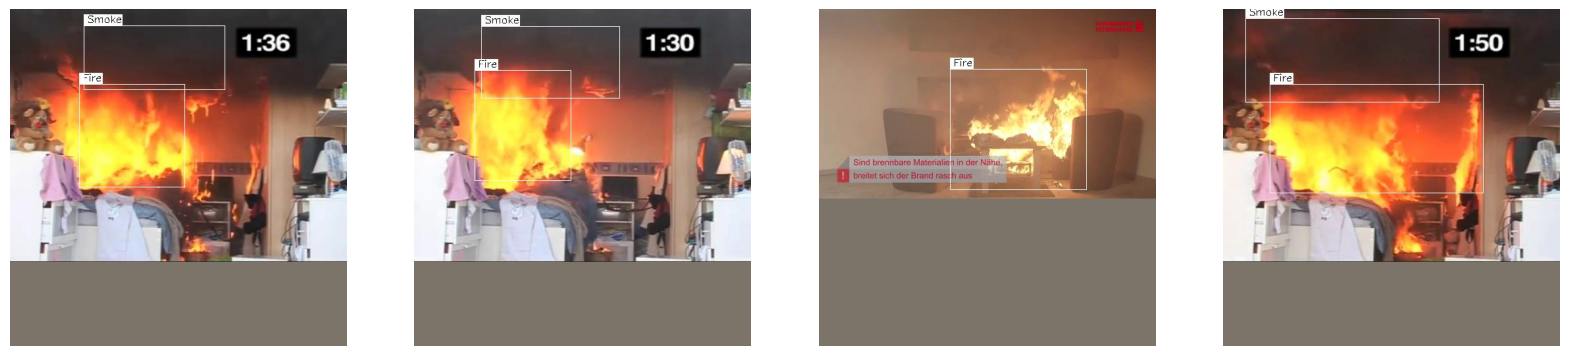

In [41]:
print("Displaying some training images:")
display(Path(vizdata_output["vizdata.output_directory.train"]))

Displaying some validation images:


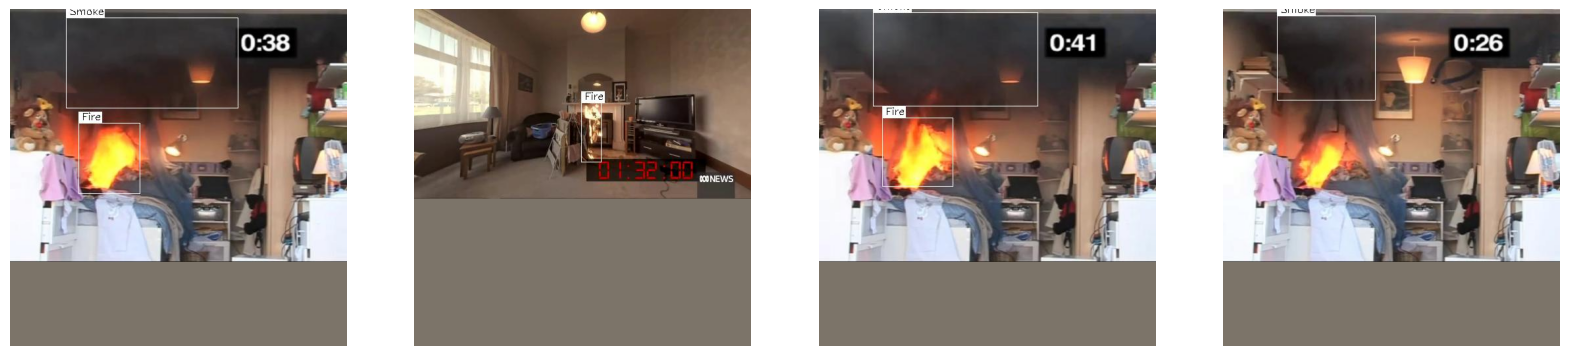

In [42]:
print("Displaying some validation images:")
display(Path(vizdata_output["vizdata.output_directory.val"]))

### Train
Lets now call the AF to train on this recipe.

In [45]:
# optional step: shorten the training 
recipe["train.num_epochs"] = 3

In [ ]:
from leip_recipe_designer.tasks import train
train_output = train(recipe)

In [46]:
print(train_output)

{'best_model_path': PosixPath('/home/sarita/tutorials/notebooks/logs/2024-03-12_10-46-11_task_efficientdet_d0_coco/lightning_logs/version_0/checkpoints/epoch=2-step=153.ckpt'), 'logger.TensorBoardLogger': {'type': 'TensorBoardLogger', 'log_dir': './lightning_logs/version_0'}, 'best_model_score': -1}


### Evaluate model
Great! now that we've trained our recipe, lets evaluate it. We will use the checkpoint generated during training

In [47]:
recipe["model.checkpoint"] = str(train_output["best_model_path"])

In [ ]:
from leip_recipe_designer.tasks import evaluate
evaluate_output = evaluate(recipe)
from pprint import pprint
pprint(evaluate_output)


### Visualize Predictions
Now, lets see what some of the predictions look like: 

In [ ]:
from leip_recipe_designer.tasks import visualize_predictions
predict_output = visualize_predictions(recipe)


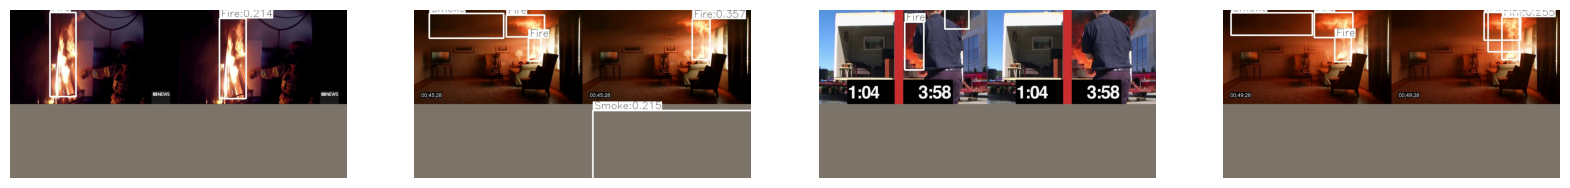

In [50]:
display(predict_output["predict.output_directory"], image_extension=predict_output["predict.output_extensions"][0])

### Export model
I'm satisfied with this model, i want to export it as a .pt by calling the AF's export commmand

In [ ]:
from leip_recipe_designer.tasks import export_model
export_output = export_model(recipe)

In [52]:
export_output

{'export.preprocessor_path': PosixPath('/home/sarita/tutorials/notebooks/artifacts/export/efficientdet_d0_coco_batch1_512-512/processors/af_preprocessor.json'),
 'export.model_path': PosixPath('/home/sarita/tutorials/notebooks/artifacts/export/efficientdet_d0_coco_batch1_512-512/traced_model.pt'),
 'export.model_schema_path': PosixPath('/home/sarita/tutorials/notebooks/artifacts/export/efficientdet_d0_coco_batch1_512-512/model_schema.yaml'),
 'export.postprocessor_path': PosixPath('/home/sarita/tutorials/notebooks/artifacts/export/efficientdet_d0_coco_batch1_512-512/processors/general_detection_postprocessor.py')}